# Main

In [7]:
### Main imports
import pandas as pd
from simulation.run import run_simulation
from visuals.plot_temp import plot_temperature
from visuals.monthly import plot_monthly_means
from visuals.plot_monthly_means import plot_monthly_hourly_means
from validate.run_validation_data import validate_simulation
from visuals.plot_selected_params import plot_parameters
from gui.visualize_greenhouse import run_visualizer
from validate.optimize import optimize_params
from greenhouse_setups.params import update_all_params
from analysis.optimize import simulate_greenhouse_raqaypampa, optimize_greenhouse_design
from data.read_nrel import compile_nrel_data
from gui.interface_wip import *
from analysis.RMSE import rmse_for_validation
from analysis.normal_crop_yield import normal_crop_yield

# Test the model on data
First you run the model.

In [11]:
file_path = "data/suticollo/2023.csv" # load in data
config_path = "suticollo_opt1.json" # config data

weather_data = compile_nrel_data(file_path)
T_init = weather_data["temperature"][0] #init temp
RH_init = weather_data["humidity"][0] #init temp
simulated_data, _, _ = run_simulation(weather_data, T_init, T_init, RH_init, "Carrot", 3600, config_path) # full year simulation

2023-02-18 02:00:00: UNSTABLE SOLUTION


Here you can choose to plot the data.

In [ ]:
selected_day = "2023-01-01" # select specific day
single_day = simulated_data[simulated_data["time"].dt.strftime('%Y-%m-%d') == selected_day]

plot_temperature(single_day, selected_day)
plot_monthly_hourly_means(simulated_data, "Feb")

In [2]:

# app = QApplication(sys.argv)
# main_window = MainWindow()
# main_window.show()
# sys.exit(app.exec())

Validation

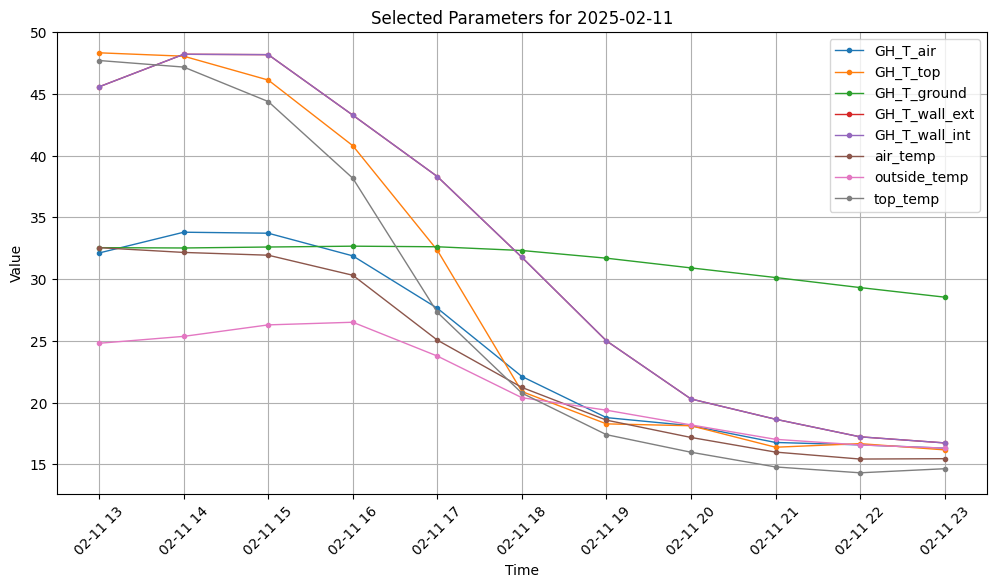

3.5122821955059136


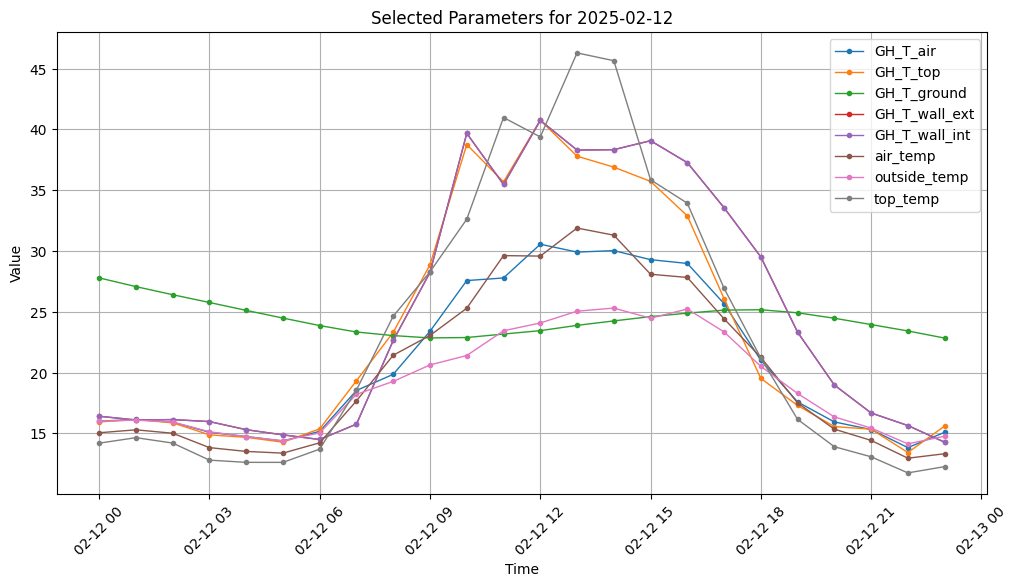

4.557437742272916


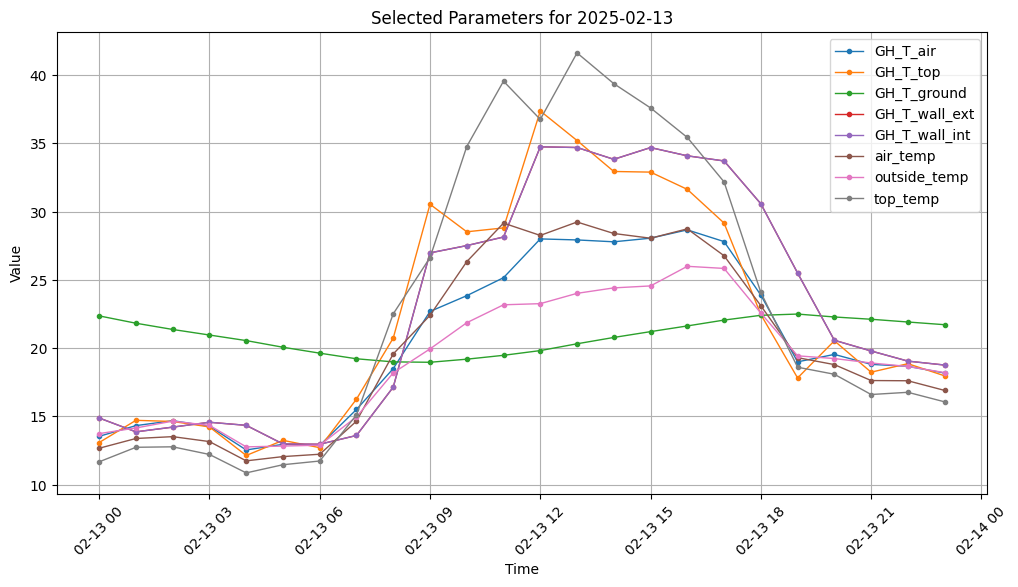

5.047583088242103


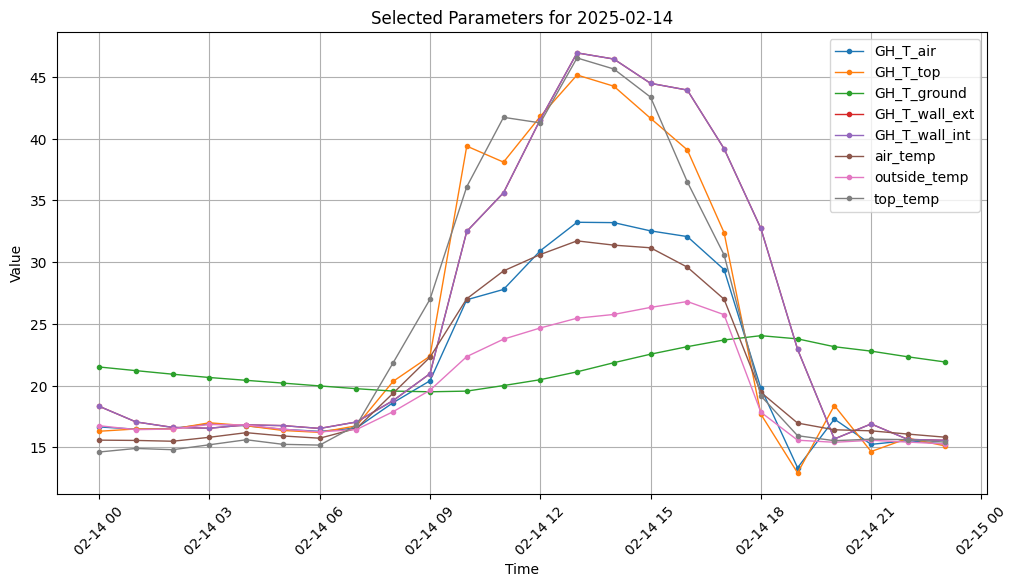

3.437958092005389


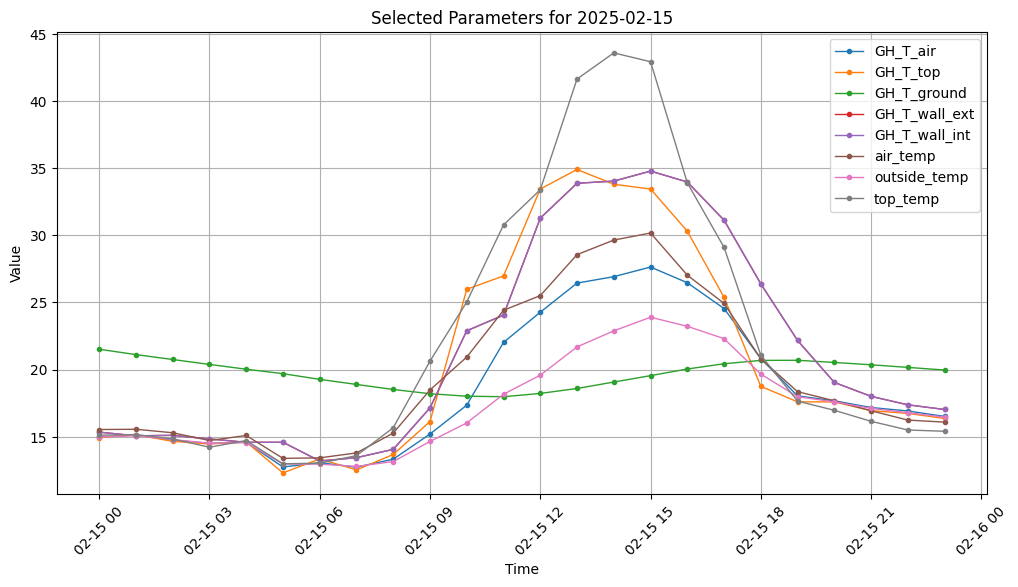

5.127003789482976


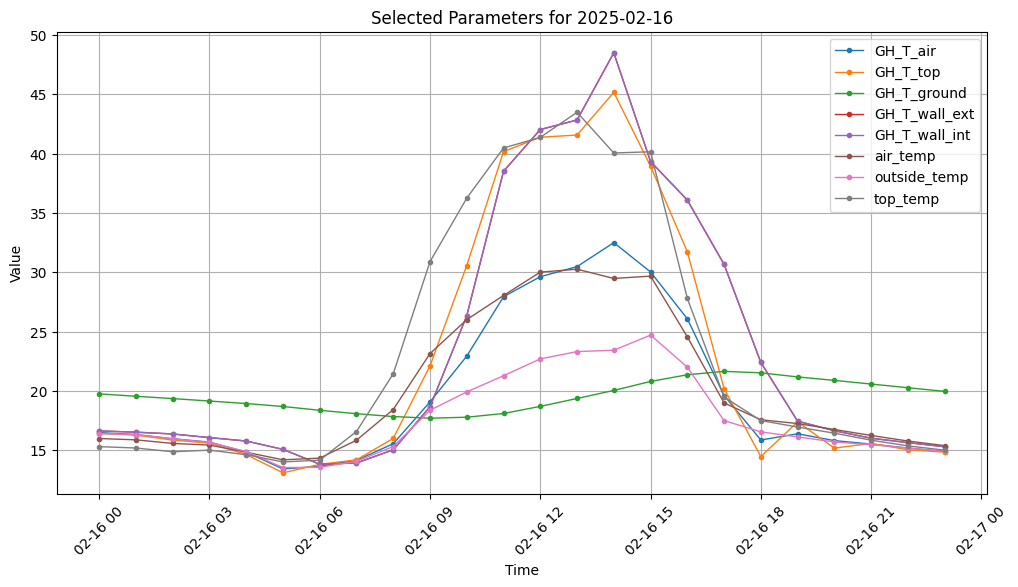

4.481480470494781


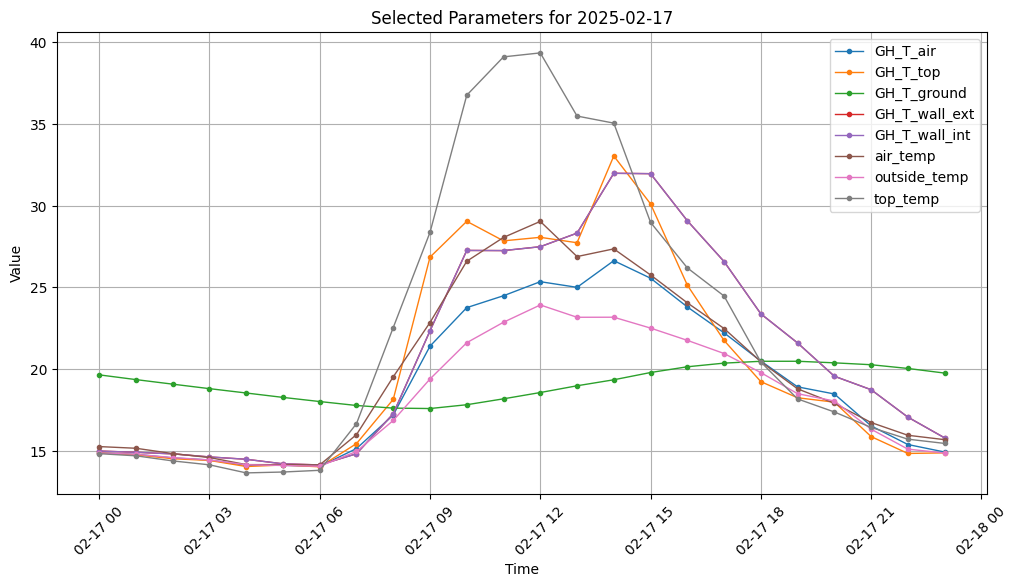

5.576288117440519


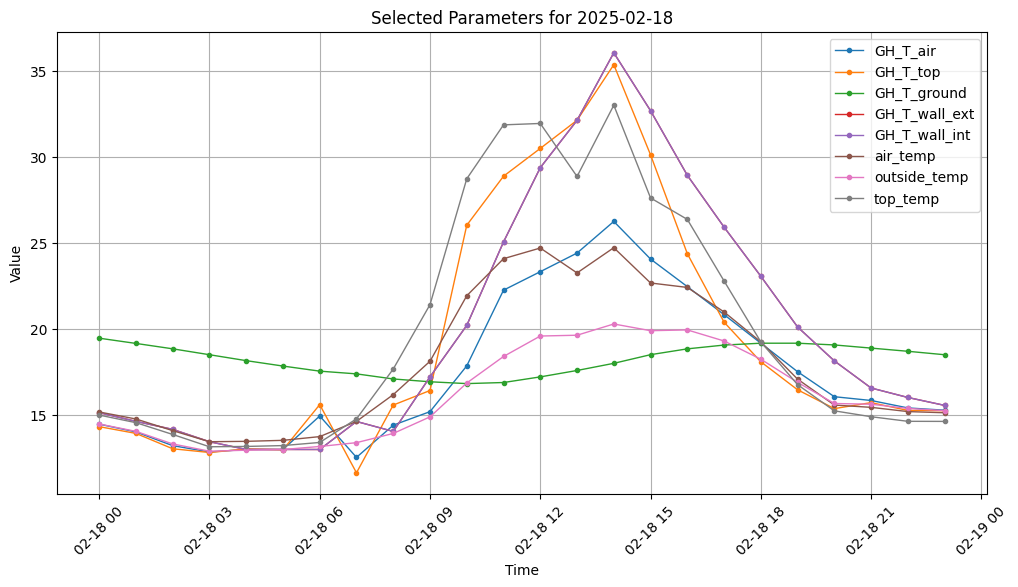

3.4501742474992616


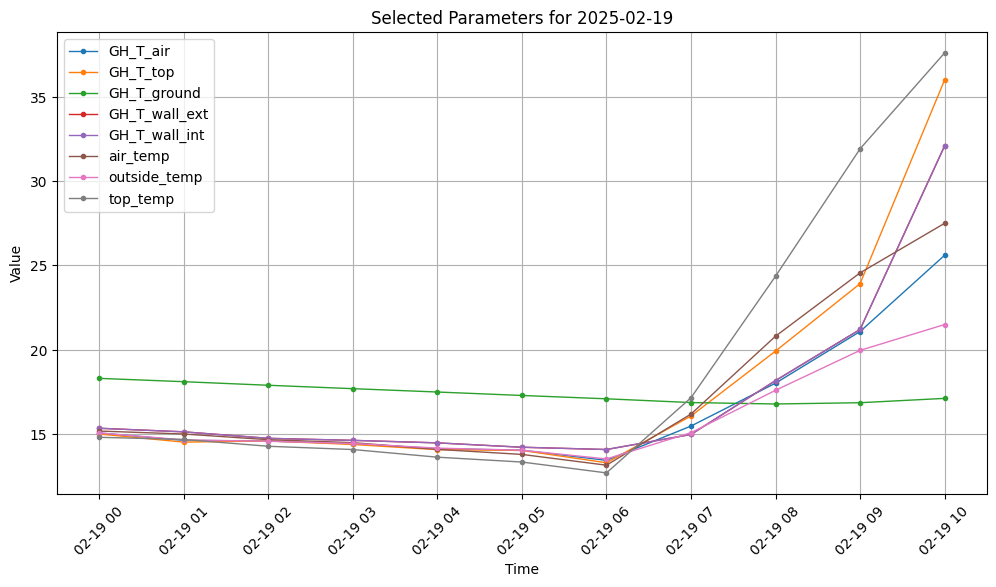

4.3228361149599746


2025-04-06 18:21:58.997 Python[8565:24777374] +[IMKClient subclass]: chose IMKClient_Legacy
2025-04-06 18:21:58.997 Python[8565:24777374] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


SystemExit: 0

/Users/filipdannevik/Library/Python/3.13/lib/python/site-packages/IPython/core/interactiveshell.py:3557: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [13]:
#opt_params, data = optimize_params()
data = validate_simulation("data/validate_data/")

data_to_display = ["GH_T_air", "GH_T_top", "GH_T_ground", "GH_T_wall_ext", "GH_T_wall_int", "air_temp", "outside_temp", "top_temp"]

for date in ["2025-02-11", "2025-02-12", "2025-02-13","2025-02-14", "2025-02-15", "2025-02-16", "2025-02-17", "2025-02-18", "2025-02-19"]:
   plot_parameters(data, data_to_display, date)
   daily_data = data[data["time"].dt.date == pd.to_datetime(date).date()]
   print(rmse_for_validation(daily_data))


#plot_parameters(data, ["humidity", "GH_humidity"], "2025-02-12")


param_file = "greenhouse_setups/suticollo_opt1.json"
run_visualizer(param_file, data)

## Simulate suticollo house in raqaypampa

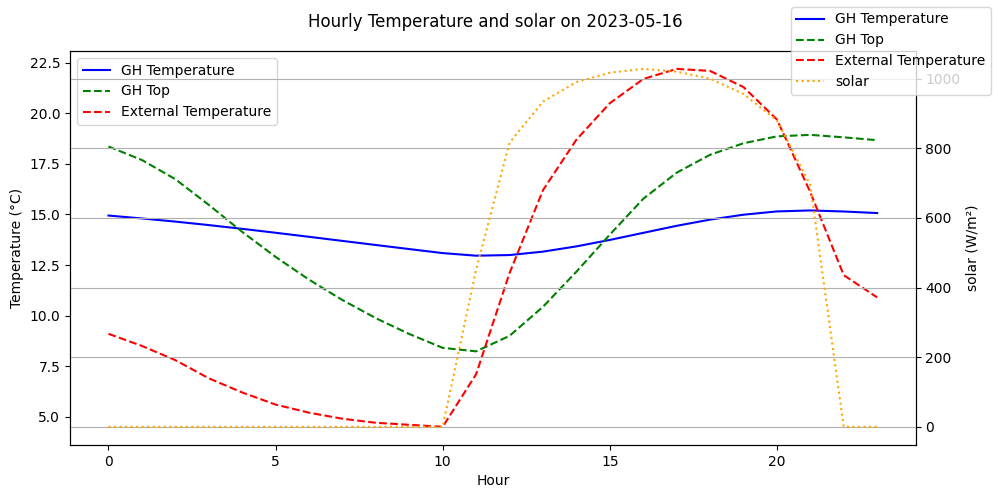

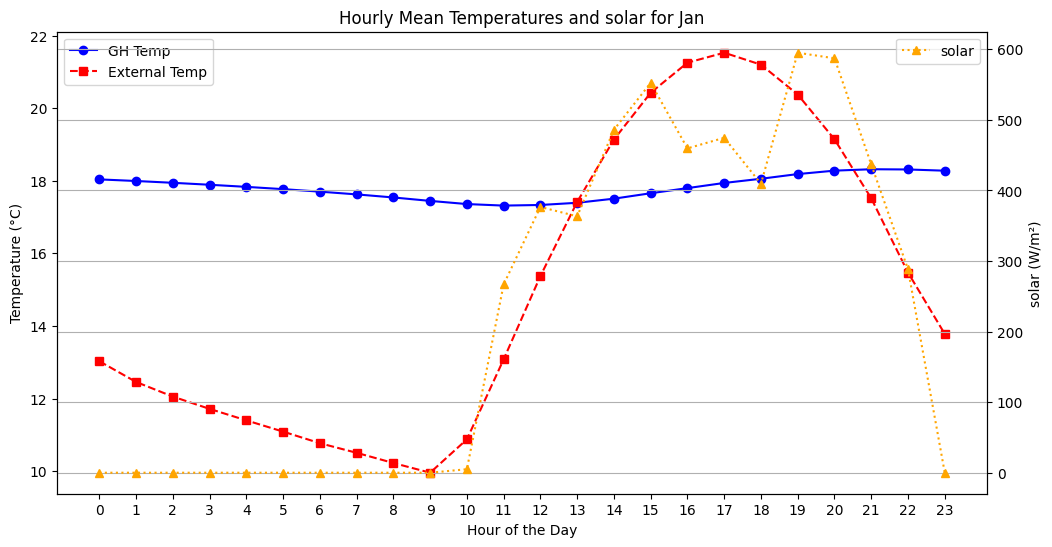

In [5]:
simulated_data, _, _ = simulate_greenhouse_raqaypampa(2023, "Lettuce", "raqay_default.json")
#simulated_data.to_csv("data/raqaypampa/simulated_greenhouse_2023.csv", index=False)

selected_day = "2023-05-16"
single_day = simulated_data[simulated_data["time"].dt.strftime('%Y-%m-%d') == selected_day]
plot_temperature(single_day, selected_day)
plot_monthly_hourly_means(simulated_data, "Jan")

# param_file = "greenhouse_setups/suticollo_opt1.json"
# run_visualizer(param_file, simulated_data)

## Optimize for Raqaypampa

In [ ]:
crop = "Lettuce"
crop_yield, total_crop = normal_crop_yield("data/raqaypampa/2023.csv", crop)
print(crop_yield, total_crop)

b_param = optimize_greenhouse_design("2023", crop, "cycle")
_, cycles, crop_yield = simulate_greenhouse_raqaypampa("2023", crop, None, b_param)
print(b_param)

## Optimize for multiple years

In [ ]:
save_values = {}
years = [2023, 2022, 2021, 2020, 2019]

for optimizing in ["cycle", "crop_mass"]:
   save_values[optimizing] = {}
   for crop in ["Lettuce", "Tomato", "Potato", "Maize", "Cassava", "Carrot", "Greenbean", "Chard", "Parsley", "Wheat", "Barley", "Beans", "Peas", "Squash", "Quinoa"]:
      save_values[optimizing][crop] = {}

      normal_cycles, total_crop_normal = normal_crop_yield([f"data/raqaypampa/{year}.csv" for year in years], crop)
      print(normal_cycles, total_crop_normal)
      b_param = optimize_greenhouse_design(years, crop, optimizing)
      _, cycles, crop_yield = simulate_greenhouse_raqaypampa(years, crop, None, b_param)

      save_values[optimizing][crop]["normal_cycles"] = normal_cycles
      save_values[optimizing][crop]["total_crop_normal"] = total_crop_normal
      save_values[optimizing][crop]["cycles"] = cycles
      save_values[optimizing][crop]["crop_yield"] = crop_yield
      save_values[optimizing][crop]["b_param"] = b_param

      print(save_values)
      with open('opt_tis11_2023_2019.json', 'w') as f:
         json.dump(save_values, f, indent=4)

print(save_values)




# with open("opt.json", "r") as file:
#     data = json.load(file)

# # Select crop
# selected_crop = "Maize" 
# profile = "raqay_default2.json"

# # Extract b_param
# b_param = next((category[selected_crop]["b_param"] for category in data.values() if selected_crop in category), None)
# simulated_data, cycles, crop_yield = simulate_greenhouse_raqaypampa("2023", selected_crop, profile, b_param)

# print(crop_yield, cycles)
# normal_cycles, total_crop_normal = normal_crop_yield("data/raqaypampa/2023.csv", selected_crop)
# print(normal_cycles, total_crop_normal)

# selected_day = "2023-05-16"
# single_day = simulated_data[simulated_data["time"].dt.strftime('%Y-%m-%d') == selected_day]
# plot_temperature(single_day, selected_day)
# plot_monthly_hourly_means(simulated_data, "Jun")

: 